Found 240 files belonging to 5 classes.
Using 192 files for training.
Found 240 files belonging to 5 classes.
Using 48 files for validation.
Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4531 - loss: 1.6526 - val_accuracy: 0.4583 - val_loss: 1.5727
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.4375 - loss: 1.4757 - val_accuracy: 0.4375 - val_loss: 1.5240
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.4688 - loss: 1.3845 - val_accuracy: 0.3958 - val_loss: 1.4939
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5781 - loss: 1.3141 - val_accuracy: 0.5000 - val_loss: 1.4542
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.6719 - loss: 1.2499 - val_accuracy: 0.4792 - val_loss: 1.3957
Epoch 1/2
6/6 ━━━━━━━━━━━━━━━━━━━━ 74s 12s/step - accuracy: 0.6667 - loss: 1.0718 - val_accuracy: 0.4792 - val_loss: 1.1302
Epoch 2/2
6/6 ━━━━━━━━━━━━━━━━━━━━ 74s 13s/step - accuracy: 0.7969 - loss: 0.6912 - val_accuracy: 0.7292 - val_loss: 0.8

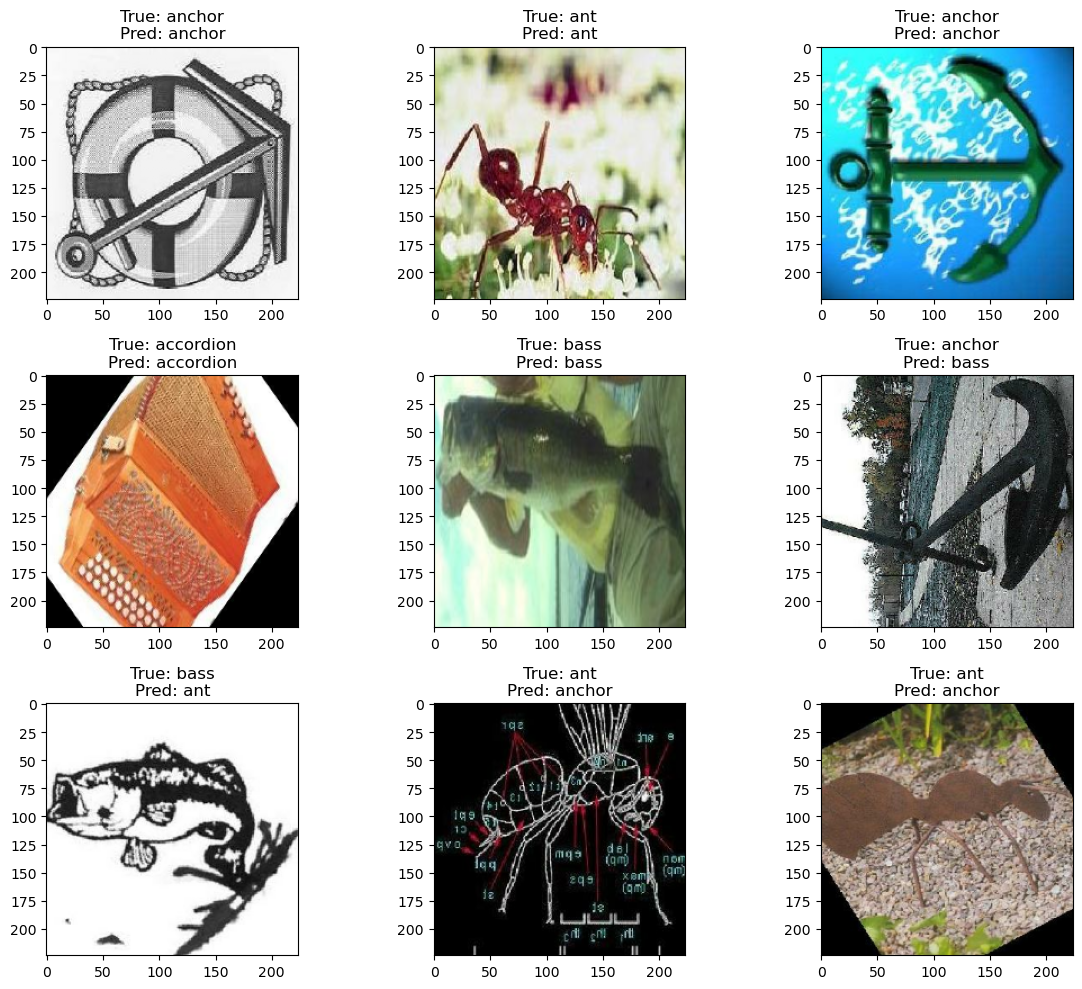

Batch Accuracy: 21/32 = 65.62%


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense , GlobalAveragePooling2D 
from tensorflow.keras.models import Sequential




train_ds = tf.keras.utils.image_dataset_from_directory(
    "image_dataset" ,validation_split=0.2 ,seed = 123 , subset = "training",
    image_size = (224 , 224) , batch_size=32)




val_ds = tf.keras.utils.image_dataset_from_directory(
    "image_dataset" , subset = "validation" , validation_split = 0.2 , seed = 123 ,
    image_size = (224,224) , batch_size = 32
)

# Class names
selected_classes = val_ds.class_names

train_ds = train_ds.map(lambda x , y : (x/255.0 , y))
val_ds = val_ds.map(lambda x , y : (x/255.0 , y))

base = VGG16(weights  = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5" , include_top=False , input_shape = (224 , 224 , 3))

base.trainable = False

model = Sequential([
    base , 
    GlobalAveragePooling2D(),
    Dense(5 , activation = "softmax")
])

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.fit(train_ds , validation_data=val_ds , epochs = 5)

base.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5))
model.fit(train_ds , validation_data = val_ds , epochs = 2)

loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")



import numpy as np
import matplotlib.pyplot as plt

# Save class names BEFORE mapping
class_names = selected_classes   # already stored earlier

# Take 1 batch
images, labels = next(iter(val_ds))

# Make predictions
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

# labels already integer
true_classes = labels.numpy()

# Display samples
plt.figure(figsize=(12, 10))
for i in range(min(9, len(images))):
    plt.subplot(3, 3, i+1)

    # Show image
    plt.imshow(images[i].numpy())
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}")
    # plt.axis('off')

plt.tight_layout()
plt.show()

# Show batch accuracy
correct = np.sum(predicted_classes == true_classes)
print(f"Batch Accuracy: {correct}/{len(images)} = {(correct/len(images))*100:.2f}%")


In [4]:
!python -m pip install --user tensorflow
